# peptide analysis

In [1]:
import pandas as pd
from utils.preprocess import *

In [3]:
merge_psm_files('../../massivekb_dataset/results/test_data_calibrated', 'output/test_data_calibrated_merged.tsv',['filename','level 1','scan','RT','sequence','mztab_filename','task_id','iRT'])

All TSV files have been merged into output/test_data_calibrated_merged.tsv


In [4]:
df = pd.read_csv("output/first_data_extended100_calibrated_merged.tsv", sep="\t",index_col=False)

In [5]:
df.head()

,filename,level 1,scan,RT,sequence,mztab_filename,task_id,iRT
0,PTSS4201SN16441.mzML,30,20919,58.286275,PVTVVVLK,Library_Augmentation_Search_-_Combined_Single_...,04fe276206f54b3c8f81798ea92aa6e3,54.739327
1,PTSS4201SN16441.mzML,196,16551,50.065410,SASSSAAGSPGGLTSLQQQK,Library_Augmentation_Search_-_Combined_Single_...,04fe276206f54b3c8f81798ea92aa6e3,42.407604
2,PTSS4201SN16441.mzML,237,17303,51.487835,MGPSRLVRGPR,Library_Augmentation_Search_-_Combined_Single_...,04fe276206f54b3c8f81798ea92aa6e3,44.541315
3,PTSS4201SN16441.mzML,245,44559,103.201400,LQPMLLEMER,Library_Augmentation_Search_-_Combined_Single_...,04fe276206f54b3c8f81798ea92aa6e3,122.114341
4,PTSS4201SN16441.mzML,258,19567,55.739282,NIIIAGPPGTGK,Library_Augmentation_Search_-_Combined_Single_...,04fe276206f54b3c8f81798ea92aa6e3,50.918706


## Overlap within files

In [6]:
overlap_in_file = df.groupby(['sequence','filename']).size().reset_index(name='count')
overlap_in_file

,sequence,filename,count
0,AAAAAAAAAAAAAAAAG,Bibo_20130621_CHS_IEF_3-10linear_24slices_15.m...,1
1,AAAAAAAAAAAAAAAAG,Bibo_20130621_CHS_IEF_3-10linear_24slices_18.m...,1
2,AAAAAAAAAAAAAAAAG,Bibo_20130621_CHS_IEF_3-10linear_24slices_20.m...,1
3,AAAAAAAAAAAAAAAAG,Bibo_20130621_CHS_IEF_3-10linear_24slices_21.m...,1
4,AAAAAAAAAAAAAAAAG,CHPP_97H_RP12_1.mzML,1
...,...,...,...
5876589,YYYYHR,b1928_293T_proteinID_08A_QE3_122212.mzXML,1
5876590,YYYYHR,colon_T_1_5.mzML,1
5876591,YYYYWHLR,20130502_EXQ6_SaDe_SA_76_05.mzML,1
5876592,YYYYWHLRK,Bibo_20130110_CHS_IEF100_20121129_3-10linear_S...,1


In [7]:
overlap_in_file['count'].describe()

count    5876594.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: count, dtype: float64

In [8]:
print(len(overlap_in_file[overlap_in_file['count']>1]))
overlap_in_file[overlap_in_file['count']>1]

0


,sequence,filename,count


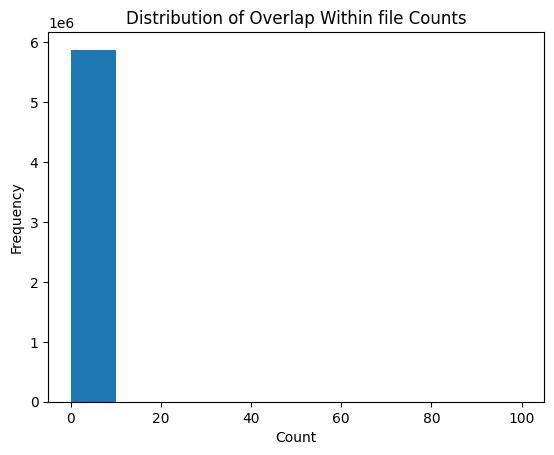

In [23]:
overlap_in_file["count"].plot.hist(range=(0, 100))
plt.title("Distribution of Overlap Within file Counts")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

## Overlap withing task

In [16]:
overlap_in_task = df.groupby('sequence')['task_id'].nunique().reset_index(name='count')
overlap_in_task

,sequence,count
0,AAAAAAAAAAAAAAAAG,5
1,AAAAAAAAAAAAAAAALAAAAGGGR,9
2,AAAAAAAAAAAAAAAASAGGK,7
3,AAAAAAAAAAAAAAAAVPR,2
4,AAAAAAAAAAAAAAAG,1
...,...,...
737157,YYYWVINPADSSGITPK,2
737158,YYYYER,15
737159,YYYYHR,43
737160,YYYYWHLR,1


In [17]:
overlap_in_task['count'].describe()

count    737162.000000
mean          7.971917
std          12.840116
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max          89.000000
Name: count, dtype: float64

In [19]:
print(len(overlap_in_task[overlap_in_task['count']>1]))
overlap_in_task[overlap_in_task['count']>1]

456869


,sequence,count
0,AAAAAAAAAAAAAAAAG,5
1,AAAAAAAAAAAAAAAALAAAAGGGR,9
2,AAAAAAAAAAAAAAAASAGGK,7
3,AAAAAAAAAAAAAAAAVPR,2
5,AAAAAAAAAAAAAAAGA,5
...,...,...
737156,YYYWAVNPQDR,26
737157,YYYWVINPADSSGITPK,2
737158,YYYYER,15
737159,YYYYHR,43


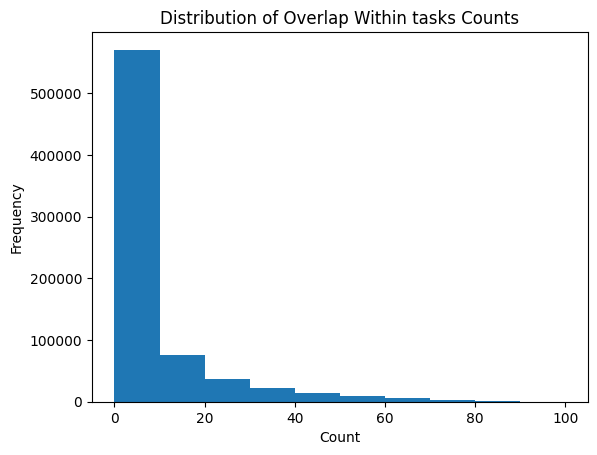

In [22]:
overlap_in_task["count"].plot.hist(range=(0, 100))
plt.title("Distribution of Overlap Within tasks Counts")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()